# National Data Science Bowl - Plankton

I will finetune vgg16 on pictures of plankton to classify various species of plankton

## Action Plan

1. Finetune and Train model
2. Generate predictions
3. Validate predictions
4. Submit predictions to Kaggle

## Imports and directories

In [1]:
#Create references to important directories we will use over and over
import os, sys
current_dir = os.getcwd()
SCRIPTS_HOME_DIR = current_dir
DATA_HOME_DIR = current_dir+'/data'

In [2]:
#import modules
from utils import *
from vgg16 import Vgg16

%matplotlib inline

Using gpu device 0: GeForce GTX 1070 (CNMeM is enabled with initial size: 85.0% of memory, cuDNN 5105)
/home/nathan/anaconda3/envs/deepLearning/lib/python3.5/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


## Finetuning and Training

Finetuning and training will allow us to take advantage of imagenet winning 

In [3]:
%cd $DATA_HOME_DIR

#Set path to sample/ path if desired
path = DATA_HOME_DIR + '/' #'/sample/'
test_path = DATA_HOME_DIR + '/test/' #We use all the test data
results_path=DATA_HOME_DIR + '/results/'
train_path=path + '/train/'
valid_path=path + '/valid/'

/home/nathan/git/planktonDataScienceBowl/scripts/data


Make use of fast.ai's Vgg16 helper class. This will allow us to import the Vgg16 imagenet model for our use

In [4]:
#import Vgg16 helper class
vgg = Vgg16()

In [5]:
#Set constants
batch_size=128
no_of_epochs=100

The primary motive behind the image generator is the fact that pictures of plankton should be rotationally invariant. Random width and height shifts as well as random shear and zooms are applied to further augment the data to help with limited training data.

In [6]:
image_generator = image.ImageDataGenerator(
                rotation_range=360,
                width_shift_range=0.02,
                height_shift_range=0.02,
                shear_range=0.05,
                zoom_range=0.05)

In [7]:
#Finetune the model
batches = vgg.get_batches(train_path, gen=image_generator, batch_size=batch_size)
val_batches = vgg.get_batches(valid_path, batch_size=batch_size)
vgg.finetune(batches)

#Not sure if we set this for all fits
vgg.model.optimizer.lr = 0.01

Found 27184 images belonging to 121 classes.
Found 3152 images belonging to 121 classes.


In [8]:
#Notice we are passing in the validation dataset to the fit() method
#For each epoch we test our model against the validation set
latest_weights_filename = None
for epoch in range(no_of_epochs):
    print ("Running epoch: %d" % epoch)
    vgg.fit(batches, val_batches, nb_epoch=1)
    latest_weights_filename = 'genWeights.h5'
#     latest_weights_filename = 'ft%d.h5' % epoch
    vgg.model.save_weights(results_path+latest_weights_filename)
print ("Completed %s fit operations" % no_of_epochs)

Running epoch: 0
Epoch 1/1
27184/27184 [==============================] - 288s - loss: 11.1522 - acc: 0.2503 - val_loss: 11.3796 - val_acc: 0.2516
Running epoch: 1
Epoch 1/1
27184/27184 [==============================] - 291s - loss: 11.0496 - acc: 0.2811 - val_loss: 11.3840 - val_acc: 0.2630
Running epoch: 2
Epoch 1/1
27184/27184 [==============================] - 289s - loss: 11.0287 - acc: 0.2890 - val_loss: 11.0429 - val_acc: 0.2919
Running epoch: 3
Epoch 1/1
27184/27184 [==============================] - 302s - loss: 11.0297 - acc: 0.2941 - val_loss: 11.2704 - val_acc: 0.2843
Running epoch: 4
Epoch 1/1
27184/27184 [==============================] - 294s - loss: 11.0918 - acc: 0.2948 - val_loss: 11.3164 - val_acc: 0.2786
Running epoch: 5
Epoch 1/1
27184/27184 [==============================] - 306s - loss: 11.1432 - acc: 0.2922 - val_loss: 11.4970 - val_acc: 0.2668
Running epoch: 6
Epoch 1/1
27184/27184 [==============================] - 390s - loss: 11.0715 - acc: 0.2982 - val_los

# Generate predictions

Next we will generate predictions of the kaggle test set.

In [13]:
test_path

'/home/nathan/git/planktonDataScienceBowl/scripts/data/test/'

In [14]:
batches, preds = vgg.test(test_path, batch_size = batch_size)

Found 130400 images belonging to 1 classes.


In [15]:
print (preds[:5])

filenames = batches.filenames
print (filenames[:5])

[[  2.0179e-24   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   7.8851e-26   1.1857e-36
    0.0000e+00   3.0076e-27   0.0000e+00   0.0000e+00   4.3020e-15   1.1372e-28   0.0000e+00
    2.3891e-07   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   1.4251e-42   0.0000e+00
    1.3664e-41   2.8026e-45   0.0000e+00   0.0000e+00   3.8167e-10   0.0000e+00   5.6725e-36
    0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   1.0126e-37   2.7086e-24
    1.0000e+00   6.7563e-33   1.3507e-34   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
    1.7614e-42   4.6812e-25   3.5929e-42   0.0000e+00   0.0000e+00   8.5251e-31   0.0000e+00
    1.4714e-43   0.0000e+00   0.0000e+00   4.0638e-44   0.0000e+00   0.0000e+00   0.0000e+00
    0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
    0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00   0.0000e+00
    0.0000e+00   0.0000e+00   3.7706e-25   0.0000e+00   0.0000e+00   0

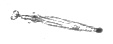

In [16]:
#You can verify the column ordering by viewing some images
from PIL import Image
Image.open(test_path + filenames[2])

In [17]:
#Save our test results arrays so we can use them again later
save_array(results_path + 'test_preds.dat', preds)
save_array(results_path + 'filenames.dat', filenames)

## Validate Predictions

Keras' *fit()* function conveniently shows us the value of the loss function, and the accuracy, after every epoch ("*epoch*" refers to one full run through all training examples). The most important metrics for us to look at are for the validation set, since we want to check for over-fitting. 

- **Tip**: with our first model we should try to overfit before we start worrying about how to reduce over-fitting - there's no point even thinking about regularization, data augmentation, etc if you're still under-fitting! (We'll be looking at these techniques shortly).

As well as looking at the overall metrics, it's also a good idea to look at examples of each of:
1. A few correct labels at random
2. A few incorrect labels at random
3. The most correct labels of each class (ie those with highest probability that are correct)
4. The most incorrect labels of each class (ie those with highest probability that are incorrect)
5. The most uncertain labels (ie those with probability closest to 0.5).

Let's see what we can learn from these examples. (In general, this is a particularly useful technique for debugging problems in the model. However, since this model is so simple, there may not be too much to learn at this stage.)

Calculate predictions on validation set, so we can find correct and incorrect examples:

In [18]:
vgg.model.load_weights(results_path+latest_weights_filename)

In [19]:
val_batches, probs = vgg.test(valid_path, batch_size = batch_size)

Found 3152 images belonging to 121 classes.


In [20]:
filenames = val_batches.filenames
expected_labels = val_batches.classes #0 or 1

#Round our predictions to 0/1 to generate labels
our_predictions = probs[:,0]
our_labels = np.round(1-our_predictions)

In [21]:
from keras.preprocessing import image

#Helper function to plot images by index in the validation set 
#Plots is a helper function in utils.py
def plots_idx(idx, titles=None):
    plots([image.load_img(valid_path + filenames[i]) for i in idx], titles=titles)
    
#Number of images to view for each visualization task
n_view = 4

Found 72 correct labels


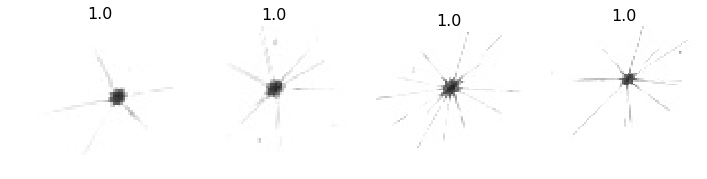

In [22]:
#1. A few correct labels at random
correct = np.where(our_labels==expected_labels)[0]
print ("Found %d correct labels" % len(correct))
idx = permutation(correct)[:n_view]
plots_idx(idx, our_predictions[idx])

Found 3080 incorrect labels


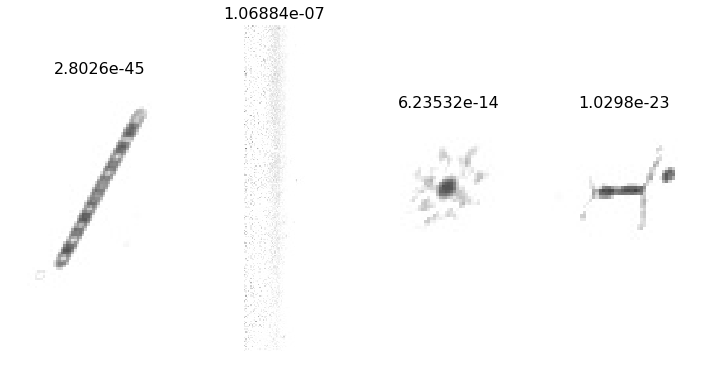

In [23]:
#2. A few incorrect labels at random
incorrect = np.where(our_labels!=expected_labels)[0]
print ("Found %d incorrect labels" % len(incorrect))
idx = permutation(incorrect)[:n_view]
plots_idx(idx, our_predictions[idx])

In [ ]:
#3a. The images we most confident were cats, and are actually cats
correct_cats = np.where((our_labels==0) & (our_labels==expected_labels))[0]
print ("Found %d confident correct cats labels" % len(correct_cats))
most_correct_cats = np.argsort(our_predictions[correct_cats])[::-1][:n_view]
plots_idx(correct_cats[most_correct_cats], our_predictions[correct_cats][most_correct_cats])

In [ ]:
#3b. The images we most confident were dogs, and are actually dogs
correct_dogs = np.where((our_labels==1) & (our_labels==expected_labels))[0]
print ("Found %d confident correct dogs labels" % len(correct_dogs))
most_correct_dogs = np.argsort(our_predictions[correct_dogs])[:n_view]
plots_idx(correct_dogs[most_correct_dogs], our_predictions[correct_dogs][most_correct_dogs])

In [ ]:
#4a. The images we were most confident were cats, but are actually dogs
incorrect_cats = np.where((our_labels==0) & (our_labels!=expected_labels))[0]
print ("Found %d incorrect cats" % len(incorrect_cats))
if len(incorrect_cats):
    most_incorrect_cats = np.argsort(our_predictions[incorrect_cats])[::-1][:n_view]
    plots_idx(incorrect_cats[most_incorrect_cats], our_predictions[incorrect_cats][most_incorrect_cats])

In [ ]:
#4b. The images we were most confident were dogs, but are actually cats
incorrect_dogs = np.where((our_labels==1) & (our_labels!=expected_labels))[0]
print ("Found %d incorrect dogs" % len(incorrect_dogs))
if len(incorrect_dogs):
    most_incorrect_dogs = np.argsort(our_predictions[incorrect_dogs])[:n_view]
    plots_idx(incorrect_dogs[most_incorrect_dogs], our_predictions[incorrect_dogs][most_incorrect_dogs])

In [ ]:
#5. The most uncertain labels (ie those with probability closest to 0.5).
most_uncertain = np.argsort(np.abs(our_predictions-0.5))
plots_idx(most_uncertain[:n_view], our_predictions[most_uncertain])

Perhaps the most common way to analyze the result of a classification model is to use a [confusion matrix](http://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/). Scikit-learn has a convenient function we can use for this purpose:

In [24]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(expected_labels, our_labels)

[[70 20  0 ...,  0  0  0]
 [ 0  2  0 ...,  0  0  0]
 [ 1  7  0 ...,  0  0  0]
 ..., 
 [ 0 33  0 ...,  0  0  0]
 [ 0 18  0 ...,  0  0  0]
 [ 3 41  0 ...,  0  0  0]]


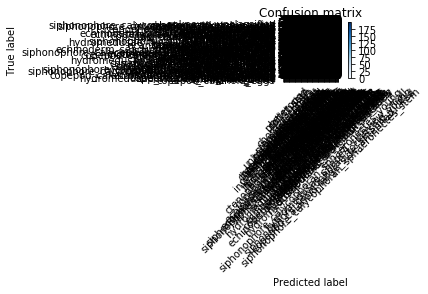

In [25]:
plot_confusion_matrix(cm, val_batches.class_indices)

## Submit Predictions to Kaggle!

Here's the format Kaggle requires for new submissions:
```
imageId,isDog
1242, .3984
3947, .1000
4539, .9082
2345, .0000
```

Kaggle wants the imageId followed by the probability of the image being a dog. Kaggle uses a metric called [Log Loss](http://wiki.fast.ai/index.php/Log_Loss) to evaluate your submission.

In [ ]:
#Load our test predictions from file
preds = load_array(results_path + 'test_preds.dat')
filenames = load_array(results_path + 'filenames.dat')

In [ ]:
#Grab the dog prediction column
isdog = preds[:,1]
print ("Raw Predictions: " + str(isdog[:5]))
print ("Mid Predictions: " + str(isdog[(isdog < .6) & (isdog > .4)]))
print ("Edge Predictions: " + str(isdog[(isdog == 1) | (isdog == 0)]))

[Log Loss](http://wiki.fast.ai/index.php/Log_Loss) doesn't support probability values of 0 or 1--they are undefined (and we have many). Fortunately, Kaggle helps us by offsetting our 0s and 1s by a very small value. So if we upload our submission now we will have lots of .99999999 and .000000001 values. This seems good, right?

Not so. There is an additional twist due to how log loss is calculated--log loss rewards predictions that are confident and correct (p=.9999,label=1), but it punishes predictions that are confident and wrong far more (p=.0001,label=1). See visualization below.

In [ ]:
#Visualize Log Loss when True value = 1
#y-axis is log loss, x-axis is probabilty that label = 1
#As you can see Log Loss increases rapidly as we approach 0
#But increases slowly as our predicted probability gets closer to 1
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import log_loss

x = [i*.0001 for i in range(1,10000)]
y = [log_loss([1],[[i*.0001,1-(i*.0001)]],eps=1e-15,labels=[1, 0]) for i in range(1,10000,1)]

plt.plot(x, y)
plt.axis([-.05, 1.1, -.8, 10])
plt.title("Log Loss when true label = 1")
plt.xlabel("predicted probability")
plt.ylabel("log loss")

plt.show()

In [ ]:
#So to play it safe, we use a sneaky trick to round down our edge predictions
#Swap all ones with .95 and all zeros with .05
isdog = isdog.clip(min=0.05, max=0.95)

In [ ]:
#Extract imageIds from the filenames in our test/unknown directory 
filenames = batches.filenames
ids = np.array([int(f[8:f.find('.')]) for f in filenames])

In [ ]:
subm = np.stack([ids,isdog], axis=1)
subm[:5]

In [ ]:
%cd $DATA_HOME_DIR
submission_file_name = 'submission1.csv'
np.savetxt(submission_file_name, subm, fmt='%d,%.5f', header='id,label', comments='')

In [ ]:
from IPython.display import FileLink
%cd $DATA_HOME_DIR
FileLink('submission1.csv')